In [2]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [210]:
Snoring_Index = ctrl.Antecedent(np.arange(0,13,1), 'Snoring_Index')
Snoring_dB    = ctrl.Antecedent(np.arange(0,71,1), 'Loudness')
Oxygenation   = ctrl.Antecedent(np.arange(0,101,1), 'SPO2')


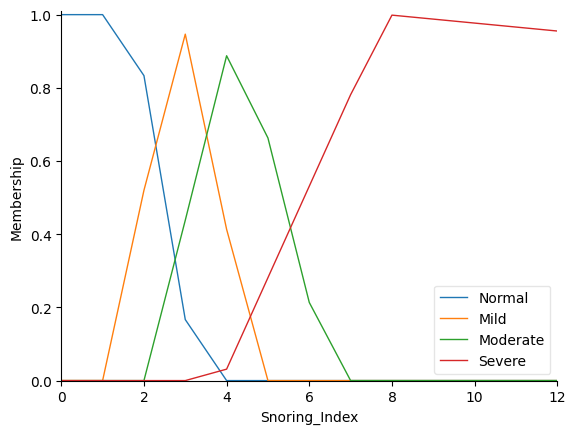

In [234]:
Snoring_Index['Normal']   = fuzz.trapmf(Snoring_index.universe, [0,0, 1.75, 3.25])
Snoring_Index['Mild']     = fuzz.trimf(Snoring_index.universe, [1.025, 2.9, 4.775])
Snoring_Index['Moderate'] = fuzz.trimf(Snoring_index.universe, [2.025, 4.25, 6.475])
Snoring_Index['Severe']   = fuzz.trimf(Snoring_index.universe, [3.875, 7.875, 100.0])  # Extend the range for 'severe'
# View the membership functions
Snoring_Index.view()


# Snoring_Index['Normal']   = fuzz.trimf(Snoring_index.universe, [1, 7, 13])
# Snoring_Index['Mild']     = fuzz.trimf(Snoring_index.universe, [4, 12, 19])
# Snoring_Index['Moderate'] = fuzz.trimf(Snoring_index.universe, [8, 17, 26])
# Snoring_Index['Severe']   = fuzz.trimf(Snoring_index.universe, [15, 32, 47.5])  # Extend the range for 'severe'
# View the membership functions


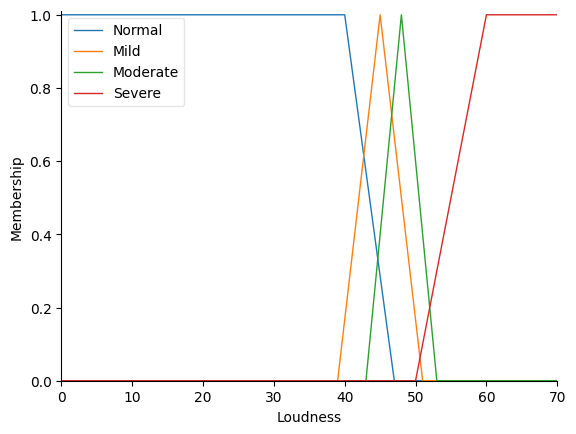

In [215]:
Snoring_dB['Normal']    = fuzz.trapmf(Snoring_dB.universe, [0,0, 40, 47])
Snoring_dB['Mild'] = fuzz.trimf(Snoring_dB.universe, [39,45, 51])
Snoring_dB['Moderate']   = fuzz.trimf(Snoring_dB.universe, [43,48,53])
Snoring_dB['Severe']   = fuzz.trapmf(Snoring_dB.universe, [50,60,70,150])
Snoring_dB.view()

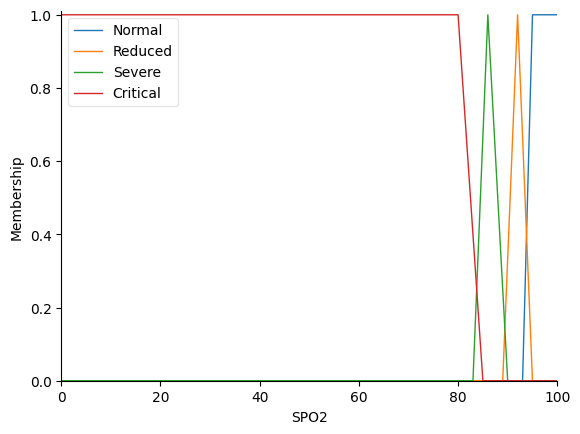

In [217]:
Oxygenation['Normal'] = fuzz.trapmf(Oxygenation.universe, [93, 95, 100, 100])
Oxygenation['Reduced'] = fuzz.trimf(Oxygenation.universe, [89,92, 95]) # 90 t0 95
Oxygenation['Severe']   = fuzz.trimf(Oxygenation.universe, [83,86,90]) # 85 to 90
Oxygenation['Critical']   = fuzz.trapmf(Oxygenation.universe, [0,0,80,85]) #below 85
Oxygenation.view()

In [136]:
# Heart_rate['Tachicardia']    = fuzz.trapmf(Heart_rate.universe, [100, 140, 200, 200]) #95 to 100
# Heart_rate['Normal'] = fuzz.trimf(Heart_rate.universe, [70,75,90]) # 90 t0 95
# Heart_rate['At rest']   = fuzz.trimf(Heart_rate.universe, [45,60,80]) # 85 to 90
# Heart_rate['Barycardia']   = fuzz.trapmf(Heart_rate.universe, [0,0,40,60]) #below 85
# Heart_rate.view()

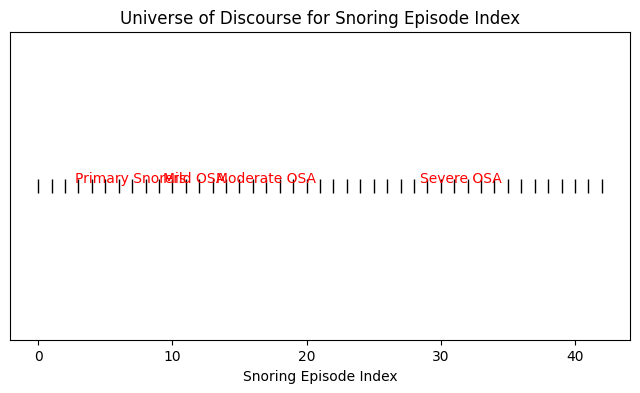

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Mean values for different severity levels
mean_primary_snorers = 6.9
mean_mild_osa = 11.6
mean_moderate_osa = 17.0
mean_severe_osa = 31.5

# Define the range around the mean for each severity level
range_around_mean = 10

# Create a universe of discourse for Snoring Episode Index
snoring_universe = np.arange(0, mean_severe_osa + range_around_mean + 1, 1)

# Plot the universe of discourse
plt.figure(figsize=(8, 4))
plt.plot(snoring_universe, np.zeros_like(snoring_universe), 'k|', markersize=10)
plt.title('Universe of Discourse for Snoring Episode Index')
plt.xlabel('Snoring Episode Index')
plt.yticks([])

# Mark mean values for each severity level
plt.text(mean_primary_snorers, 0, 'Primary Snorers', ha='center', va='bottom', color='r')
plt.text(mean_mild_osa, 0, 'Mild OSA', ha='center', va='bottom', color='r')
plt.text(mean_moderate_osa, 0, 'Moderate OSA', ha='center', va='bottom', color='r')
plt.text(mean_severe_osa, 0, 'Severe OSA', ha='center', va='bottom', color='r')

# Show the plot
plt.show()


In [137]:
# HR_Var['low']    = fuzz.trimf(HR_Var.universe, [0, 0, 10])
# HR_Var['medium'] = fuzz.trimf(HR_Var.universe, [0,10, 20])
# HR_Var['high']   = fuzz.trapmf(HR_Var.universe, [10,30,50,50])
# HR_Var.view()

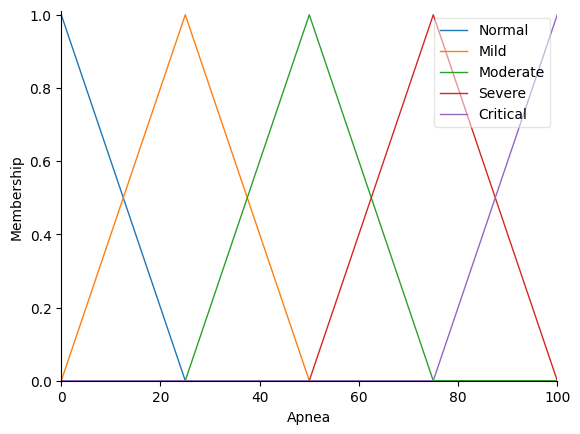

In [184]:
Apnea = ctrl.Consequent(np.arange(0,101,1), 'Apnea')

Apnea.automf(5, names = ['Normal', 'Mild',
                  'Moderate',
                 'Severe',
            'Critical'])
Apnea.view()

In [142]:
# rule1 = ctrl.Rule(antecedent = (Oxygenation['Critical']), consequent =Apnea['critical'])
# rule2 = ctrl.Rule(antecedent= (Oxygenation['Severe'] & Snoring_index['severe'] & Snoring_dB['Severe']), consequent =Apnea['severe'])
# rule3 = ctrl.Rule(antecedent= (Oxygenation['reduced'] or Oxygenation['Severe'] & Snoring_index['moderate'] & Snoring_dB['moderate']), consequent =Apnea['moderate'])
# rule4 = ctrl.Rule(antecedent= (Oxygenation['reduced'] & Snoring_dB['mild'] & Snoring_index['mild']), consequent =Apnea['mild'])
# rule5 = ctrl.Rule(antecedent= (Oxygenation['Severe'] & Snoring_dB['mild'] & Snoring_index['mild']), consequent =Apnea['moderate'])
# rule6 = ctrl.Rule(antecedent= (Oxygenation['Normal'] & Snoring_index['Normal'] & Snoring_dB['low']), consequent =Apnea['Normal'])
# rule7 = ctrl.Rule(antecedent= (Oxygenation['Severe'] & Snoring_index['severe'] & Snoring_dB['low']), consequent =Apnea['severe'])
# rule8 = ctrl.Rule(antecedent= (Oxygenation['reduced'] & Snoring_index['moderate'] & Snoring_dB['low']),consequent =Apnea['moderate'])
# rule9 = ctrl.Rule(antecedent= (Oxygenation['Normal'] & Snoring_index['severe'] & Snoring_dB['Severe']), consequent =Apnea['moderate'])

# #snoring frequency!!
# #count the time between snores

apnea_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# # Create a simulation with the control system
# apnea_sim = ctrl.ControlSystemSimulation(apnea_ctrl)

In [194]:
rule1 = ctrl.Rule(Oxygenation['Critical'], Apnea['Critical'])
rule2 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Normal'] & Oxygenation['Normal'], Apnea['Normal'])#
rule2 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Normal'] & Oxygenation['Reduced'], Apnea['Normal'])#
rule3 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Normal'] & Oxygenation['Severe'], Apnea['Moderate'])#
rule4 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Mild'] & Oxygenation['Normal'], Apnea['Normal'])#
rule5 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Mild'] & Oxygenation['Reduced'], Apnea['Normal'])#
rule6 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Mild'] & Oxygenation['Severe'], Apnea['Moderate'])#
rule7 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Moderate'] & Oxygenation['Normal'], Apnea['Normal'])
rule8 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Moderate'] & Oxygenation['Reduced'], Apnea['Normal'])
rule9 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Moderate'] & Oxygenation['Severe'], Apnea['Moderate'])
rule10 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Severe'] & Oxygenation['Normal'], Apnea['Mild'])
rule11 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Severe'] & Oxygenation['Reduced'], Apnea['Mild'])
rule12 = ctrl.Rule(Snoring_Index['Normal'] & Snoring_dB['Severe'] & Oxygenation['Severe'], Apnea['Severe'])
rule13 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Normal'] & Oxygenation['Normal'], Apnea['Normal'])
rule14 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Normal'] & Oxygenation['Reduced'], Apnea['Mild'])
rule15 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Normal'] & Oxygenation['Severe'], Apnea['Moderate'])
rule16 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Mild'] & Oxygenation['Normal'], Apnea['Mild'])
rule17 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Mild'] & Oxygenation['Reduced'], Apnea['Mild'])
rule18 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Mild'] & Oxygenation['Severe'], Apnea['Moderate'])
rule19 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Moderate'] & Oxygenation['Normal'], Apnea['Mild'])
rule20 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Moderate'] & Oxygenation['Reduced'], Apnea['Mild'])
rule21 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Moderate'] & Oxygenation['Severe'], Apnea['Moderate'])
rule22 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Severe'] & Oxygenation['Normal'], Apnea['Mild'])
rule23 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Severe'] & Oxygenation['Reduced'], Apnea['Mild'])
rule24 = ctrl.Rule(Snoring_Index['Mild'] & Snoring_dB['Severe'] & Oxygenation['Severe'], Apnea['Severe'])
rule25 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Normal'] & Oxygenation['Normal'], Apnea['Mild'])
rule26 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Normal'] & Oxygenation['Reduced'], Apnea['Moderate'])
rule27 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Normal'] & Oxygenation['Severe'], Apnea['Severe'])
rule28 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Mild'] & Oxygenation['Normal'], Apnea['Moderate'])
rule29 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Mild'] & Oxygenation['Reduced'], Apnea['Moderate'])
rule30 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Mild'] & Oxygenation['Severe'], Apnea['Severe'])
rule31 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Moderate'] & Oxygenation['Normal'], Apnea['Moderate'])
rule32 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Moderate'] & Oxygenation['Reduced'], Apnea['Moderate'])
rule33 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Moderate'] & Oxygenation['Severe'], Apnea['Severe'])
rule34 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Severe'] & Oxygenation['Normal'], Apnea['Moderate'])
rule35 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Severe'] & Oxygenation['Reduced'], Apnea['Severe'])
rule36 = ctrl.Rule(Snoring_Index['Moderate'] & Snoring_dB['Severe'] & Oxygenation['Severe'], Apnea['Severe'])
rule37 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Normal'] & Oxygenation['Normal'], Apnea['Moderate'])
rule38 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Normal'] & Oxygenation['Reduced'], Apnea['Moderate'])
rule39 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Normal'] & Oxygenation['Severe'], Apnea['Severe'])
rule40 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Mild'] & Oxygenation['Normal'], Apnea['Moderate'])
rule41 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Mild'] & Oxygenation['Reduced'], Apnea['Severe'])
rule42 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Mild'] & Oxygenation['Severe'], Apnea['Severe'])
rule43 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Moderate'] & Oxygenation['Normal'], Apnea['Moderate'])
rule44 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Moderate'] & Oxygenation['Reduced'], Apnea['Severe'])
rule45 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Moderate'] & Oxygenation['Severe'], Apnea['Severe'])
rule46 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Severe'] & Oxygenation['Normal'], Apnea['Severe'])
rule47 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Severe'] & Oxygenation['Reduced'], Apnea['Severe'])
rule48 = ctrl.Rule(Snoring_Index['Severe'] & Snoring_dB['Severe'] & Oxygenation['Severe'], Apnea['Severe'])

In [218]:
rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
         rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20,
         rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30,
         rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40,
         rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48]

severity_ctrl = ctrl.ControlSystem(rules)
severity_evaluator = ctrl.ControlSystemSimulation(severity_ctrl)

In [225]:
num_data_points = 144  # 24 hours * 60 minutes / 10 minutes

# Simulate minimum blood oxygenation levels (percentage)
min_oxygen_levels = np.random.uniform(75, 99, num_data_points)
average_snoring_intensity = np.random.uniform(30, 75, num_data_points)
num_consecutive_snores = np.random.randint(0, 10, num_data_points)

In [175]:
import pandas as pd

In [228]:
simulated_data = pd.DataFrame({
    'Time': pd.date_range(start='2023-01-01', periods=num_data_points, freq='10T'),
    'Min_Oxygen': min_oxygen_levels,
    'Avg_Snoring_Intensity': average_snoring_intensity,
    'Snoring_Index': num_consecutive_snores
})


In [238]:
# for index, row in simulated_data.iterrows():
#     # Set input values

#     severity_evaluator.input['SPO2'] = row['Min_Oxygen']
#     severity_evaluator.input['Snoring_Index'] = row['Snoring_Index']
#     severity_evaluator.input['Loudness'] = row['Avg_Snoring_Intensity']
#     print(row['Min_Oxygen'], row['Snoring_Index'],  row['Avg_Snoring_Intensity'])
#     # Evaluate the fuzzy system
#     severity_evaluator.compute()

#     # Store the result in a new column (replace with your actual output variable)
#     simulated_data.at[index, 'Fuzzy_Apnea'] = severity_evaluator.output['Apnea']
    
# # Display the first few rows of the simulated data with fuzzy severity values
# print(simulated_data[['Time', 'Min_Oxygen', 'Snoring_Index', 'Avg_Snoring_Intensity', 'Fuzzy_Apnea']].head())

In [240]:
from scipy.io import loadmat

# Load the FIS from the MATLAB file
mat_data = loadmat('Apnea Severity.fis')
fis_data = mat_data['fis']


ValueError: Unknown mat file type, version 10, 39